In this notebook, we will use pre-trained models to perform image classification.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

import glob
import os

from zipfile import ZipFile
from urllib.request import urlretrieve

/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# 1. Load Sample Images

In [2]:
def download_and_unzip(url, save_path):

    # downloading zip file using urllib package
    urlretrieve(url, save_path)

    # extracting zip file using the zipfile package
    with ZipFile(save_path) as z:

        # extract ZIP file contents in the same directory
        z.extractall(os.path.split(save_path)[0])

In [3]:
URL = r'https://www.dropbox.com/s/8srx6xdjt9me3do/TF-Keras-Bootcamp-NB07-assets.zip?dl=1'
save_path = os.path.join(os.getcwd(), 'TF-Keras-Bootcamp-NB07-assets.zip')
download_and_unzip(URL, save_path)

In [4]:
# read sample images

image_paths = glob.glob('images' + os.sep + '*.png')
print('{} images'.format(len(image_paths)))

8 images


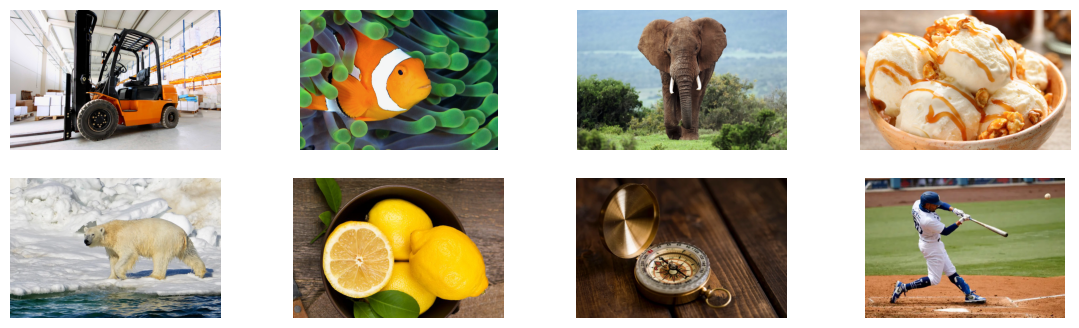

In [5]:
# display the images that we will predict

plt.figure(figsize=(14, 4))
for i, image_path in enumerate(image_paths):
    image = plt.imread(image_path)
    plt.subplot(2, 4, i + 1)
    plt.imshow(image)
    plt.axis('off')

# 2. Load the Pre-Trained Models

In [6]:
model_vgg16 = tf.keras.applications.vgg16.VGG16()
model_resnet50 = tf.keras.applications.resnet50.ResNet50()
model_inception_v3 = tf.keras.applications.inception_v3.InceptionV3()

In [7]:
print('VGG16 shape:', model_vgg16.input_shape)
print('ResNet50 shape:', model_resnet50.input_shape)
print('InceptionV3 shape:', model_inception_v3.input_shape)

VGG16 shape: (None, 224, 224, 3)
ResNet50 shape: (None, 224, 224, 3)
InceptionV3 shape: (None, 299, 299, 3)


The first (unspecified) dimension is the batch size, followed by the spatial size and the number of channels. When we process images using these models, we are free to specify the number of images in a batch, but the shape of each image must conform to the dimensions indicated above.

# 3. Create a Function for Batch Processing

1. Read the image
2. Decode the image to a numeric tensor
3. Resize the image to the size required by the model
4. Add a batch dimension to the image tensor

In [8]:
def process_image(image_path, size, preprocess_input):

    '''
    returns `decoded_image` is used for visualization, `image_batch` used for prediction
    '''

    # read the image using TensorFlow
    tf_image = tf.io.read_file(image_path)

    # decode the above `tf_image` from a Bytes string to a numeric Tensor
    decoded_image = tf.image.decode_image(tf_image)

    # resize the image to the spatial size required by the model
    image_resized = tf.image.resize(decoded_image, size)

    # add a batch dimension to the first axis (required) 
    image_batch = tf.expand_dims(image_resized, axis=0)

    # pre-process the input image
    image_batch = preprocess_input(image_batch)

    return decoded_image, image_batch

# 4. Make Predictions using the Pre-Trained Models 

Create a function that predicts the image:

1. Call the model's `predict()` method to make predictions
2. Decode the predictions to find the class name and confidence score for the top-k predictions
3. Display the image

In [9]:
def prediction(model, processed_image, decoded_image, display_top_k=False, top_k=2, display_image=False):

    '''
    returns the predicted class and its probability
    '''

    # forward pass through the model to make prediction 
    preds = model.predict(processed_image, verbose=0)

    # decode (and rank the top-k) predictions
    # returns a list of tuples: (class ID, class description, probability)
    decoded_preds = tf.keras.applications.imagenet_utils.decode_predictions(preds=preds, top=5)

    if display_top_k:
        for rank in range(top_k):
            classID, class_name, prob = decoded_preds[0][rank]
            print('Top {} predicted class: {}, probability = {:.2f}%'.format(rank + 1, class_name, prob * 100))
    
    if display_image:
        plt.figure(figsize=(3, 3))
        plt.imshow(decoded_image)
        plt.axis('off')
        classID, class_name, prob = decoded_preds[0][0]
        title = class_name + ' ' + str('{:.2f}%'.format(prob * 100))
        plt.title(title)

    return decoded_preds[0][0][1], decoded_preds[0][0][2]

## 4.1 VGG-16

In [10]:
size = (224, 224) 
preprocess_input = tf.keras.applications.vgg16.preprocess_input

Top 1 predicted class: lemon, probability = 94.01%
Top 2 predicted class: orange, probability = 4.14%


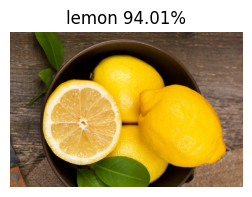

In [11]:
# predict one image

decoded_image, processed_image = process_image(image_paths[5], size, preprocess_input)
pred = prediction(model_vgg16, processed_image, decoded_image, display_top_k=True, top_k=2, display_image=True)

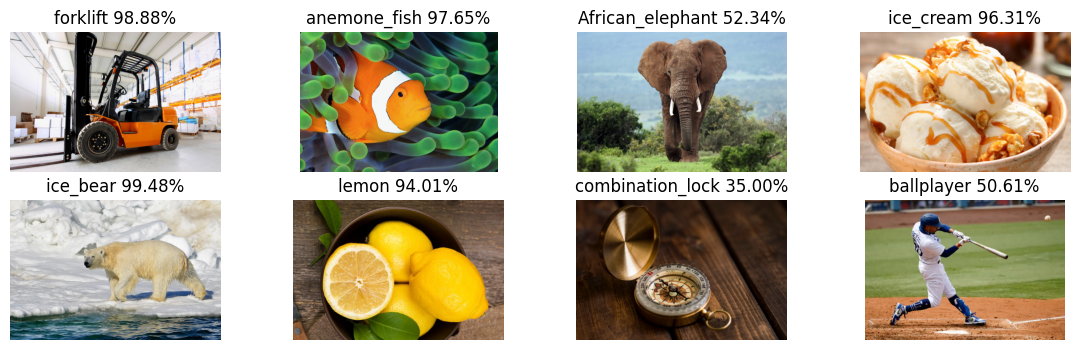

In [12]:
# predict all images

plt.figure(figsize=(14,4))
for i, image_path in enumerate(image_paths):
    decoded_image, processed_image = process_image(image_path, size, preprocess_input)
    pred_class, pred_prob = prediction(model_vgg16, processed_image, decoded_image, display_top_k=False, top_k=2, display_image=False)
    plt.subplot(2, 4, i+1)
    plt.imshow(decoded_image)
    plt.axis('off')
    title = pred_class + ' ' + str('{:.2f}%'.format(pred_prob * 100))
    plt.title(title)

## 4.2 ResNet50

In [13]:
size = (224, 224)
preprocess_input = tf.keras.applications.resnet50.preprocess_input

Top 1 predicted class: lemon, probability = 96.42%
Top 2 predicted class: orange, probability = 2.72%


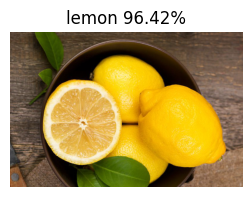

In [14]:
# predict one image

decoded_image, processed_image = process_image(image_paths[5], size, preprocess_input)
pred = prediction(model_resnet50, processed_image, decoded_image, display_top_k=True, top_k=2, display_image=True)

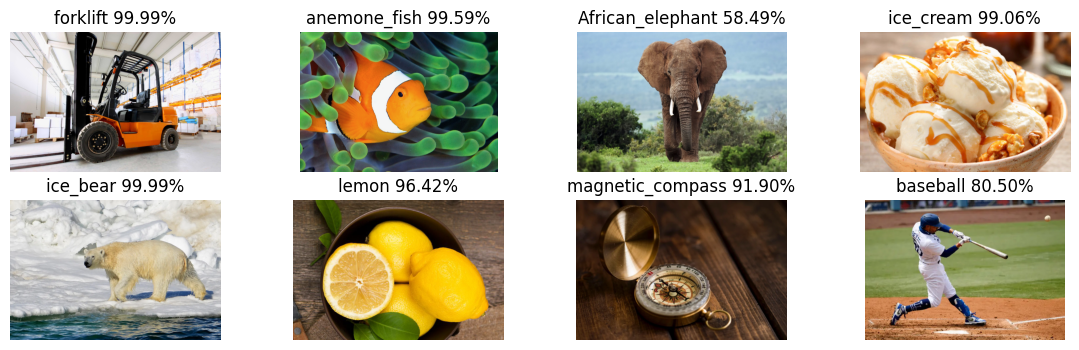

In [15]:
# predict all images

plt.figure(figsize=(14,4))
for i, image_path in enumerate(image_paths):
    decoded_image, processed_image = process_image(image_path, size, preprocess_input)
    pred_class, pred_prob = prediction(model_resnet50, processed_image, decoded_image, display_top_k=False, top_k=2, display_image=False)
    plt.subplot(2, 4, i+1)
    plt.imshow(decoded_image)
    plt.axis('off')
    title = pred_class + ' ' + str('{:.2f}%'.format(pred_prob * 100))
    plt.title(title)

## 4.3  Inception-V3

In [16]:
size = (299, 299)
preprocess_input = tf.keras.applications.inception_v3.preprocess_input

Top 1 predicted class: lemon, probability = 97.06%
Top 2 predicted class: orange, probability = 2.12%


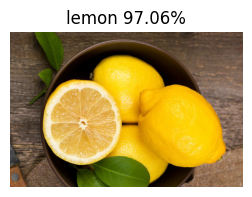

In [17]:
# predict one image

decoded_image, processed_image = process_image(image_paths[5], size, preprocess_input)
pred = prediction(model_inception_v3, processed_image, decoded_image, display_top_k=True, top_k=2, display_image=True)

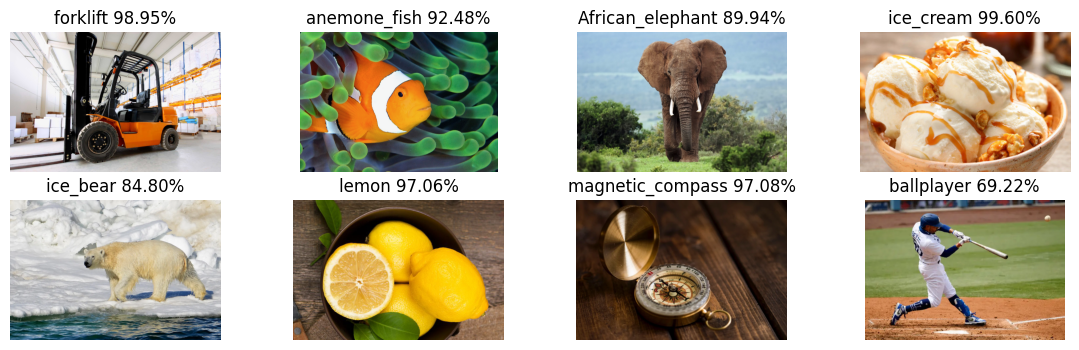

In [18]:
# predict all images

plt.figure(figsize=(14,4))
for i, image_path in enumerate(image_paths):
    decoded_image, processed_image = process_image(image_path, size, preprocess_input)
    pred_class, pred_prob = prediction(model_inception_v3, processed_image, decoded_image, display_top_k=False, top_k=2, display_image=False)
    plt.subplot(2, 4, i+1)
    plt.imshow(decoded_image)
    plt.axis('off')
    title = pred_class + ' ' + str('{:.2f}%'.format(pred_prob * 100))
    plt.title(title)